In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.interpolate import spline
from matplotlib.ticker import LinearLocator, FormatStrFormatter

path = 'exp_results/'
RWD = 'rewards.npy'
CMP = 'comp_ps.npy'
NS_LIST = [100, 200, 400, 800, 1000, 1500, 2000, 3000, 5000, 8000]

In [5]:
def smooth_rwd(rwd,ratio=10):
    new_rwd = np.zeros(rwd.shape)
    tmp = rwd[0]
    for i in range(rwd.size):
        tmp = (1-1/ratio)*tmp + 1/ratio*rwd[i]
        new_rwd[i] = tmp
    return new_rwd

C5.2 Bottleneck Effect -- phA
----------

In [6]:
Path_phA1200 = 'Reset_both_11/'
Path_phA1000 = 'Reset_both_01/'
Path_phA800  = 'Reset_both_12/'
Path_phA600  = 'Reset_both_13/'
Path_phA400  = 'Reset_both_14/'
Path_phA200  = 'Reset_both_15/'
Path_phA100  = 'Reset_both_16/'
Path_phA50   = 'Reset_both_17/'
Path_phA1500 = 'Reset_both_18/'
Path_phA2000 = 'Reset_both_19/'
Path_phA3000 = 'Reset_both_21/'
Path_phA5000 = 'Reset_both_20/'
Path_phA8000 = 'Reset_both_22/'
#Path_phA5000 = 'test_both_spk_and_lis_long/'

Path_phB8000 = 'Reset_both_25/'
Path_phB4000 = 'Reset_both_10/'
Path_phB3000 = 'Reset_both_09/'
Path_phB2000 = 'Reset_both_01/'
Path_phB1500 = 'Reset_both_24/'
Path_phB1000 = 'Reset_both_05/'
Path_phB800  = 'Reset_both_06/'
Path_phB600  = 'Reset_both_07/'
Path_phB400  = 'Reset_both_08/'
Path_phB200  = 'Reset_both_23/'


SMOOTH_RATIO = 5

In [7]:
def cmp_avg_std(CMP_phA):
    
    matrix_cmp = CMP_phA.reshape((100,-1))
    averag_cmp = smooth_rwd(np.average(matrix_cmp,axis=1),SMOOTH_RATIO)
    standa_cmp = smooth_rwd(matrix_cmp.std(1), 2*SMOOTH_RATIO)
    return averag_cmp, standa_cmp

In [8]:
CMP_phA5000 = cmp_avg_std(np.load(path+Path_phA5000+CMP))
CMP_phA2000 = cmp_avg_std(np.load(path+Path_phA2000+CMP))
CMP_phA1500 = cmp_avg_std(np.load(path+Path_phA1500+CMP))
CMP_phA1000 = cmp_avg_std(np.load(path+Path_phA1000+CMP))
CMP_phA1200 = cmp_avg_std(np.load(path+Path_phA1200+CMP))
CMP_phA800  = cmp_avg_std(np.load(path+Path_phA800+CMP))
#CMP_phA600  = cmp_avg_std(np.load(path+Path_phA600+CMP))
CMP_phA400  = cmp_avg_std(np.load(path+Path_phA400+CMP))
CMP_phA200  = cmp_avg_std(np.load(path+Path_phA200+CMP))
CMP_phA100  = cmp_avg_std(np.load(path+Path_phA100+CMP))
#CMP_phA50   = cmp_avg_std(np.load(path+Path_phA50+CMP))

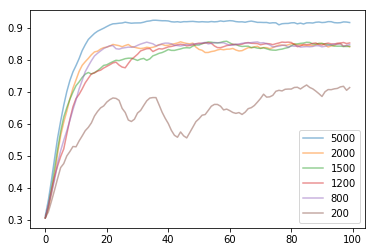

In [9]:
plt.plot(CMP_phA5000[0],label='5000',alpha=0.5)
plt.plot(CMP_phA2000[0],label='2000',alpha=0.5)
plt.plot(CMP_phA1500[0],label='1500',alpha=0.5)
plt.plot(CMP_phA1200[0],label='1200',alpha=0.5)
plt.plot(CMP_phA800[0],label='800',alpha=0.5)
#plt.plot(CMP_phA600[0],label='600',alpha=0.5)
plt.plot(CMP_phA200[0],label='200',alpha=0.5)
#plt.plot(CMP_phA50[0],label='50',alpha=0.5)
plt.legend()
plt.show()

In [10]:
CONV_SPD = [0, 10]
#CONV_PER = [85, 95]

avg_5000 = CMP_phA5000[0][CONV_SPD[0]:CONV_SPD[1]].mean()
avg_2000 = CMP_phA2000[0][CONV_SPD[0]:CONV_SPD[1]].mean()
avg_1500 = CMP_phA1500[0][CONV_SPD[0]:CONV_SPD[1]].mean()
avg_1200 = CMP_phA1200[0][CONV_SPD[0]:CONV_SPD[1]].mean()
avg_1000 = CMP_phA1000[0][CONV_SPD[0]:CONV_SPD[1]].mean()
avg_800  = CMP_phA800[0][CONV_SPD[0]:CONV_SPD[1]].mean()
#avg_600  = CMP_phA600[0][CONV_SPD[0]:CONV_SPD[1]].mean()
avg_400  = CMP_phA400[0][CONV_SPD[0]:CONV_SPD[1]].mean()
avg_200  = CMP_phA200[0][CONV_SPD[0]:CONV_SPD[1]].mean()
avg_100  = CMP_phA100[0][CONV_SPD[0]:CONV_SPD[1]].mean()
#avg_50   = CMP_phA50[0][CONV_SPD[0]:CONV_SPD[1]].mean()

std_5000 = CMP_phA5000[0][CONV_SPD[0]:CONV_SPD[1]].std()
std_2000 = CMP_phA2000[0][CONV_SPD[0]:CONV_SPD[1]].std()
std_1500 = CMP_phA1500[0][CONV_SPD[0]:CONV_SPD[1]].std()
std_1200 = CMP_phA1200[0][CONV_SPD[0]:CONV_SPD[1]].std()
std_1000 = CMP_phA1000[0][CONV_SPD[0]:CONV_SPD[1]].std()
std_800  = CMP_phA800[0][CONV_SPD[0]:CONV_SPD[1]].std()
#std_600  = CMP_phA600[0][CONV_SPD[0]:CONV_SPD[1]].std()
std_400  = CMP_phA400[0][CONV_SPD[0]:CONV_SPD[1]].std()
std_200  = CMP_phA200[0][CONV_SPD[0]:CONV_SPD[1]].std()
std_100  = CMP_phA100[0][CONV_SPD[0]:CONV_SPD[1]].std()
#std_50   = CMP_phA50[0][CONV_SPD[0]:CONV_SPD[1]].std()

y_plt_avg = np.asarray([avg_100, avg_200, avg_400, avg_800, avg_1000, avg_1500, avg_2000, avg_5000, avg_5000, avg_5000])
y_plt_std = np.asarray([std_100, std_200, std_400, std_800, std_1000, std_1500, std_2000, std_5000, std_5000, std_5000])
print('Average and std comp for the first 10 rounds')

for i in range(len(NS_LIST)):
    print(NS_LIST[i], y_plt_avg[i])

Average and std comp for the first 10 rounds
100 0.2553579362248106
200 0.42887398369795876
400 0.4519711573965465
800 0.48283667421359394
1000 0.5062341367416778
1500 0.5249341303857684
2000 0.5158977572306158
3000 0.5606699933562742
5000 0.5606699933562742
8000 0.5606699933562742


In [11]:
len(NS_LIST)

10

In [12]:
CONV_SPD = [90, 99]

avg_5000 = CMP_phA5000[0][CONV_SPD[0]:CONV_SPD[1]].mean()
avg_2000 = CMP_phA2000[0][CONV_SPD[0]:CONV_SPD[1]].mean()
avg_1500 = CMP_phA1500[0][CONV_SPD[0]:CONV_SPD[1]].mean()
avg_1200 = CMP_phA1200[0][CONV_SPD[0]:CONV_SPD[1]].mean()
avg_1000 = CMP_phA1000[0][CONV_SPD[0]:CONV_SPD[1]].mean()
avg_800  = CMP_phA800[0][CONV_SPD[0]:CONV_SPD[1]].mean()
#avg_600  = CMP_phA600[0][CONV_SPD[0]:CONV_SPD[1]].mean()
avg_400  = CMP_phA400[0][CONV_SPD[0]:CONV_SPD[1]].mean()
avg_200  = CMP_phA200[0][CONV_SPD[0]:CONV_SPD[1]].mean()
avg_100  = CMP_phA100[0][CONV_SPD[0]:CONV_SPD[1]].mean()
#avg_50   = CMP_phA50[0][CONV_SPD[0]:CONV_SPD[1]].mean()

std_5000 = CMP_phA5000[0][CONV_SPD[0]:CONV_SPD[1]].std()
std_2000 = CMP_phA2000[0][CONV_SPD[0]:CONV_SPD[1]].std()
std_1500 = CMP_phA1500[0][CONV_SPD[0]:CONV_SPD[1]].std()
std_1200 = CMP_phA1200[0][CONV_SPD[0]:CONV_SPD[1]].std()
std_1000 = CMP_phA1000[0][CONV_SPD[0]:CONV_SPD[1]].std()
std_800  = CMP_phA800[0][CONV_SPD[0]:CONV_SPD[1]].std()
#std_600  = CMP_phA600[0][CONV_SPD[0]:CONV_SPD[1]].std()
std_400  = CMP_phA400[0][CONV_SPD[0]:CONV_SPD[1]].std()
std_200  = CMP_phA200[0][CONV_SPD[0]:CONV_SPD[1]].std()
std_100  = CMP_phA100[0][CONV_SPD[0]:CONV_SPD[1]].std()
#std_50   = CMP_phA50[0][CONV_SPD[0]:CONV_SPD[1]].std()

y_plt_avg = np.asarray([avg_100, avg_200, avg_400, avg_800, avg_1000, avg_1500, avg_2000, avg_5000, avg_5000, avg_5000])
y_plt_std = np.asarray([std_100, std_200, std_400, std_800, std_1000, std_1500, std_2000, std_5000, std_5000, std_5000])
print('Average and std comp for the last 10 rounds')

for i in range(len(NS_LIST)):
    print(NS_LIST[i], y_plt_avg[i])


Average and std comp for the last 10 rounds
100 0.20332804656400003
200 0.7063590550228729
400 0.835869383624443
800 0.8457760976286405
1000 0.8490996938300563
1500 0.8452704160509986
2000 0.8461192451799762
3000 0.9176224948792672
5000 0.9176224948792672
8000 0.9176224948792672


In [13]:
SMOOTH_RATIO=1
RWD_phA5000 = cmp_avg_std(np.load(path+Path_phA5000+RWD)/64)
RWD_phA2000 = cmp_avg_std(np.load(path+Path_phA2000+RWD)/64)
RWD_phA1500 = cmp_avg_std(np.load(path+Path_phA1500+RWD)/64)
RWD_phA1000 = cmp_avg_std(np.load(path+Path_phA1000+RWD)/64)
RWD_phA1200 = cmp_avg_std(np.load(path+Path_phA1200+RWD)/64)
RWD_phA800  = cmp_avg_std(np.load(path+Path_phA800+RWD)/64)
#RWD_phA600  = cmp_avg_std(np.load(path+Path_phA600+RWD)/64)
RWD_phA400  = cmp_avg_std(np.load(path+Path_phA400+RWD)/64)
RWD_phA200  = cmp_avg_std(np.load(path+Path_phA200+RWD)/64)
RWD_phA100  = cmp_avg_std(np.load(path+Path_phA100+RWD)/64)
#CMP_phA50   = cmp_avg_std(np.load(path+Path_phA50+RWD)/64)

print(RWD_phA5000[0].max())

0.93756875


C5.2 Bottleneck Effect -- phB
----------

In [76]:
NS_LIST_B = [400, 600, 800, 1000, 2000, 3000, 4000]
CMP_phB4000 = cmp_avg_std(np.load(path+Path_phB4000+CMP))
CMP_phB3000 = cmp_avg_std(np.load(path+Path_phB3000+CMP))
CMP_phB2000 = cmp_avg_std(np.load(path+Path_phB2000+CMP))
CMP_phB1000 = cmp_avg_std(np.load(path+Path_phB1000+CMP))
CMP_phB800  = cmp_avg_std(np.load(path+Path_phB800+CMP))
CMP_phB600  = cmp_avg_std(np.load(path+Path_phB600+CMP))
CMP_phB400  = cmp_avg_std(np.load(path+Path_phB400+CMP))

CONV_SPD = [90, 99]
#CONV_PER = [85, 95]

Bavg_4000 = CMP_phB4000[0][CONV_SPD[0]:CONV_SPD[1]].mean()
Bavg_3000 = CMP_phB3000[0][CONV_SPD[0]:CONV_SPD[1]].mean()
Bavg_2000 = CMP_phB2000[0][CONV_SPD[0]:CONV_SPD[1]].mean()
Bavg_1000 = CMP_phB1000[0][CONV_SPD[0]:CONV_SPD[1]].mean()
Bavg_800 = CMP_phB800[0][CONV_SPD[0]:CONV_SPD[1]].mean()
Bavg_600 = CMP_phB600[0][CONV_SPD[0]:CONV_SPD[1]].mean()
Bavg_400 = CMP_phB400[0][CONV_SPD[0]:CONV_SPD[1]].mean()

y_plt_avg = np.asarray([Bavg_400, Bavg_600, Bavg_800, Bavg_1000, Bavg_2000,Bavg_3000,Bavg_4000])

print('Average and std comp for the first 10 rounds')

for i in range(len(NS_LIST_B)):
    print(NS_LIST_B[i], y_plt_avg[i])

Average and std comp for the first 10 rounds
400 0.41852697850610254
600 0.8478566720082268
800 0.8402126114684434
1000 0.8364977824982428
2000 0.8447633621903857
3000 0.8521999430350609
4000 0.8572534542458171


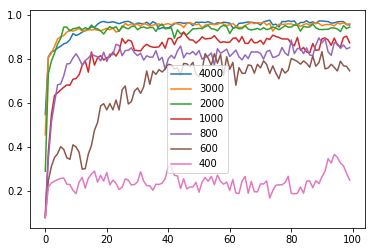

Average and std comp for the first 10 rounds
400 0.365390625
600 0.83234375
800 0.8950390625
1000 0.922140625
2000 0.9581015625
3000 0.9666666666666667
4000 0.97513671875


In [78]:
RWD_phB4000 = cmp_avg_std(np.load(path+Path_phB4000+RWD)/64)
RWD_phB3000 = cmp_avg_std(np.load(path+Path_phB3000+RWD)/64)
RWD_phB2000 = cmp_avg_std(np.load(path+Path_phB2000+RWD)/64)
RWD_phB1000 = cmp_avg_std(np.load(path+Path_phB1000+RWD)/64)
RWD_phB800  = cmp_avg_std(np.load(path+Path_phB800+RWD)/64)
RWD_phB600  = cmp_avg_std(np.load(path+Path_phB600+RWD)/64)
RWD_phB400  = cmp_avg_std(np.load(path+Path_phB400+RWD)/64)

plt.plot(RWD_phB4000[0],label='4000')
plt.plot(RWD_phB3000[0],label='3000')
plt.plot(RWD_phB2000[0],label='2000')
plt.plot(RWD_phB1000[0],label='1000')
plt.plot(RWD_phB800[0],label='800')
plt.plot(RWD_phB600[0],label='600')
plt.plot(RWD_phB400[0],label='400')
plt.legend()
plt.show()

y_plt_avg = np.asarray([RWD_phB400, RWD_phB600, RWD_phB800, RWD_phB1000, RWD_phB2000,RWD_phB3000,RWD_phB4000])

print('Average and std comp for the first 10 rounds')

for i in range(len(NS_LIST_B)):
    print(NS_LIST_B[i], y_plt_avg[i].max())


In [153]:
RWD_phB400[0].shape

(100,)